# DIP Programming Tutorial in python
by zyh in 2020 Fall

Programming tricks and sample test.
There will be no tutorial in other Programming language,

## About the programming test

1. Date and time: Nov. 23, 1:30 ~ 4:30 PM. Select another time slot and contact TA, if you are currently not in China.
2. 30 points for the first 3 questions, and 10 points + 20 additional points for the last question.
3. submit your .ipynb file to **zhuyh19@mails.tsinghua.edu.cn**
4. You are not allowed to use `import` command since all the necessary libs have been imported
5. Your code will be judge by randomly generated samples or manually constructed corner cases. it will be like some online judge. But TA will manually give a score if you make some mistakes and your code fail to run.
6. You are allowed to read the doc website to help to code and debugging. But don't try to search for the solution.
7. Don't copy other students' code, and don't let other students copy your code.

## Important Topics in Programming Test:

1. interpolation in higher dimention
2. convolutional or non-convolutional filter, including mean, gaussian, sobel, laplacian and wiener filter
3. DCT in digital image/video processing.


In [29]:
import numpy as np
from numpy import array, zeros, arange, exp, random, ones_like, zeros_like,ones
from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.signal import convolve,convolve2d,correlate2d,correlate
from imageio import imread
import itertools,math
import matplotlib.pyplot as plt
import unittest

## Basics(20 mins)
refer to rush tutorial:https://cs231n.github.io/python-numpy-tutorial/

make sure you understand the following concept and know how to use it:

1. scalar calculation
2. if and for loop
3. list slice
4. function

## Vector and Matrix Calculation

reading material:

1. Efficiency: https://petewarden.com/2015/04/20/why-gemm-is-at-the-heart-of-deep-learning/
2. STN: https://towardsdatascience.com/review-stn-spatial-transformer-network-image-classification-d3cbd98a70aa

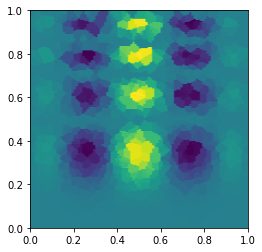

In [25]:
from numpy import meshgrid
from scipy.interpolate import griddata
import numpy as np

# GEMM
x=ones([100,100])
# x
y=ones([100,1])
# y

x*y

x@y

print((x*y).shape,(x@y).shape)


# Convolution
convolve(y, ones([10,1]))

# implicit function
f=lambda x,y: x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

# grid and sampler(NOT in the exam)
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
# print(grid_x[0:100,0],grid_x.shape)

points = np.random.rand(1000, 2)
values = f(points[:,0], points[:,1])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.show()

## Test sample visualization

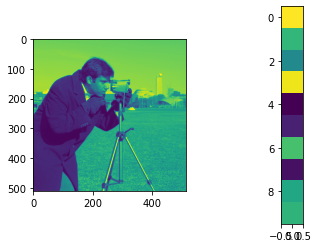

In [38]:
image=imread('./sample_image_camera.png')
tensor_for_q1=random.uniform(0,1,[10,1])
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(tensor_for_q1)
plt.show()

## Sample questions 1. (30 Points) Interpolation
You are required to implementing a variable-scale 1d resize funnction using linear innterpolation algorithm. More specifically, given a vector $I \in \mathbb{R}^{l_1}$ and target size $L_1$ your implementationn should output resized $O \in \mathbb{R}^{L_1}$. Your implementation should be "conor aligned", e.g. $O[0]=I[0]$, $O[L_1-1]=I[l_1-1]$

Hint: $O[i]=I[floor(i*(l_1-1)/(L_1-1))]*(floor(i*(l_1-1)/(L_1-1))+1-(i*(l_1-1)/(L_1-1)))) + I[floor(i*(l_1-1)/(L_1-1))+1]*(i*(l_1-1)/(L_1-1)-floor(i*(l_1-1)/(L_1-1)))$. 


testing sample_test_inter_1d: True


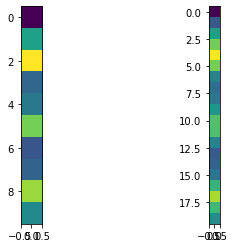

In [18]:
def inter_1d(I:array,target_size:int):
    intered=zeros([target_size,1])
    l_1=I.shape[0]
    L_1=target_size
    ############# write your code here: begin#############

    # Solution 1: for loop, 
    for i in range(L_1):
        I_idx_left=math.floor(i/(L_1-1)*(l_1-1))
        # I_idx_left=math.floor((1.0*i*l_1+0.5)/L_1)
        I_coef_left=math.floor(i/(L_1-1)*(l_1-1))+1 - i/(L_1-1)*(l_1-1)

        I_idx_right=math.floor(i/(L_1-1)*(l_1-1))+1
        I_coef_right=i/(L_1-1)*(l_1-1) - math.floor(i/(L_1-1)*(l_1-1))
        print (I_idx_left,I_coef_left,I_idx_right,I_coef_right)
        if I_coef_right>0.0:
            intered[i,0]=I[I_idx_left,0]*I_coef_left + I[I_idx_right,0]*I_coef_right
        else:
            intered[i,0]=I[I_idx_left,0]*I_coef_left
    ############# write your code here: end#############
    return intered



# NOT available in the exam, only for turtorial
class DIPTest():
    def test_inter_1d(self):
        tensor_for_q1=random.uniform(0,1,[10,1])
        rt=inter_1d(tensor_for_q1,20)
        plt.subplot(121)
        plt.imshow(tensor_for_q1)
        plt.subplot(122)
        plt.imshow(rt)
        
        from scipy import interpolate # only for test
        f=interpolate.interp1d(array([i/9.0 for i in range(10)]), tensor_for_q1[:,0], kind='linear')
        gt=array([f(i/19.0) for i in range(20)])
        print()
        if abs(gt-rt[:,0]).sum()<1e-5:
            return True
        else:
            return False
        pass
    def test(self):
        print("testing sample_test_inter_1d:",self.test_inter_1d())

DIPTest().test()



## Sample questions 2. (30 Points) Mean Filter

You are required to implement a 2D Mean Filter, apply it on a input gray scale image $I \in \mathbb{R}^{H \times W}$ and return the filtered image $O \in \mathbb{R}^{H \times W}$. 

In details, you should implement 2 function, `mean_kernel(sigma:float)-> array`, and `apply_kernel(image:array,kernel:array)->array` .

In [32]:
def mean_kernel(window_size:int)-> array:
    kernel=zeros([window_size,window_size])
    ############# write your code here: begin#############
    N=window_size**2
    kernel=ones_like(kernel)*1.0/N
    ############# write your code here: end#############
    return kernel
# mean_kernel(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

testing sample_test_inter_1d: True


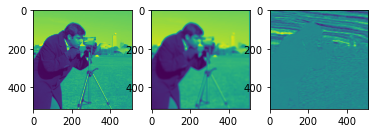

In [37]:
def apply_kernel(image:array,kernel:array)->array:
    applied_image=np.zeros_like(image)
    window_size=kernel.shape[0]
    half_window_size=window_size//2
    assert window_size % 2 == 1
    ############# write your code here: begin###########
    # solution 1: for loop
    H,W = image.shape
    paded_image = np.zeros((H+window_size-1,W+window_size-1))
    paded_image[half_window_size:H+half_window_size,half_window_size:W+half_window_size]=image
    for i in range(H):
        for j in range(W):
            patch=paded_image[i:i+window_size,j:j+window_size]
            applied_patch=(patch*kernel).sum()
            applied_image[i,j]=applied_patch
    

    # H,W=image.shape
    # paded_image=np.zeros([H+window_size-1,W+window_size-1])
    # paded_image[half_window_size:H+half_window_size,half_window_size:W+half_window_size]=image
    # for i in range(H):
    #     for j in range(W):
    #         patch=paded_image[i:i+window_size,j:j+window_size]
    #         applied_patch=(patch*kernel).sum()
    #         applied_image[i,j]=applied_patch
    
    # solution 2: convolution
    applied_image_2=convolve2d(image, kernel, mode='full', boundary='fill', fillvalue=0)
    ############# write your code here: end#############
    return applied_image

# mage=imread('imageio:camera.png')*1.0
# rt=apply_kernel(image,mean_kernel(11))
# plt.imshow(image)
# plt.show()
# NOT available in the exam, only for turtorial
class DIPTest():
    def test_mean_filter(self):
        image=imread('imageio:camera.png')*1.0
        rt=apply_kernel(image,mean_kernel(11))
        gt=convolve2d(image, mean_kernel(11), mode='same', boundary='fill', fillvalue=0)
#         rt=inter_1d(tensor_for_q1,20)
        plt.subplot(131)
        plt.imshow(image)
        plt.subplot(132)
        plt.imshow(rt)
        plt.subplot(133)
        plt.imshow(gt-rt)
#         print(image.max())
#         print(abs(gt-rt).mean())
        if abs(gt-rt).mean()<1e-5:
            return True
        else:
            return False
        pass
    def test(self):
        print("testing sample_test_inter_1d:",self.test_mean_filter())
DIPTest().test()